In [7]:
import numpy as np
import matplotlib.pyplot as plt

# 데이터를 생성하고 반환하는 함수입니다.
def load_data():
    
    X = np.array([[8.70153760], [3.90825773], [1.89362433], [3.28730045], [7.39333004], [2.98984649], [2.25757240], [9.84450732], [9.94589513], [5.48321616]])
    y = np.array([[5.64413093], [3.75876583], [3.87233310], [4.40990425], [6.43845020], [4.02827829], [2.26105955], [7.15768995], [6.29097441], [5.19692852]])
    
    return X, y

"""
1.  입력값(X)과 beta_0,beta_1를 바탕으로 
    예측값(pre_y)을 계산하여 반환하는 함수를 구현합니다.
    
    회귀 함수 식을 참고하여
    예측값을 계산합니다.
"""
def prediction(beta_0, beta_1, X):
    
    y_pred = beta_0 + beta_1*X
    
    return y_pred
    

# beta_0와 beta_1 값을 업데이트 하는 규칙을 정의하는 함수입니다.
def update_beta(X, y, y_pred, lr):
    
    delta_0 = -(lr * (2 / len(X)) * np.sum(y - y_pred))
    
    delta_1 = -(lr * (2 / len(X)) * (np.dot(X.T, (y - y_pred))))
    
    return delta_0, delta_1
    



학습 횟수 : 0
학습 횟수 : 100
학습 횟수 : 200
학습 횟수 : 300
학습 횟수 : 400
학습 횟수 : 500
학습 횟수 : 600
학습 횟수 : 700
학습 횟수 : 800
학습 횟수 : 900
1000번의 학습 이후의 회귀 알고리즘 결과
beta_0: [0.21056] beta_1: [0.75204095]


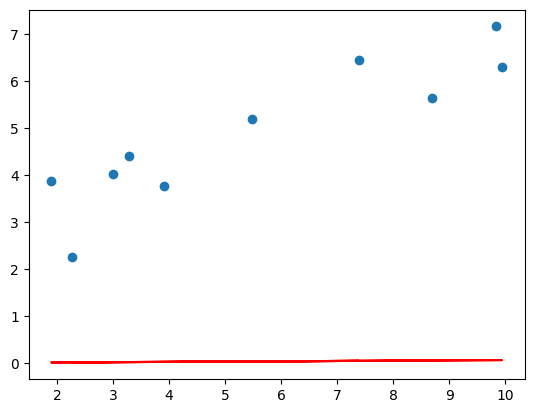

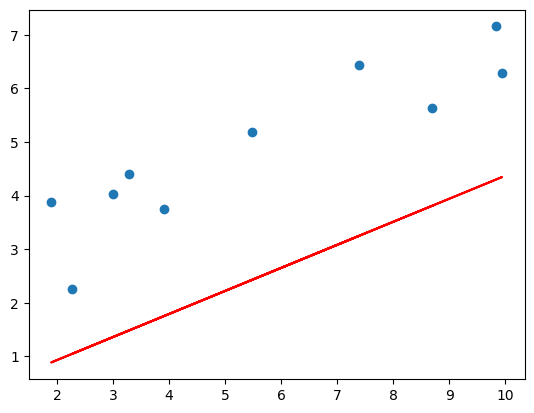

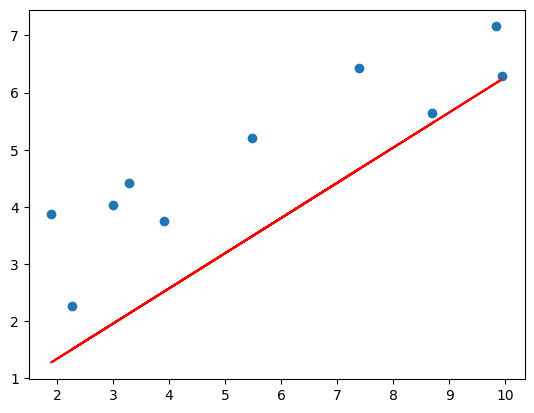

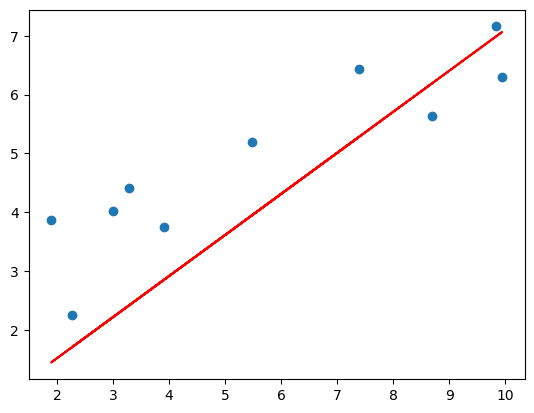

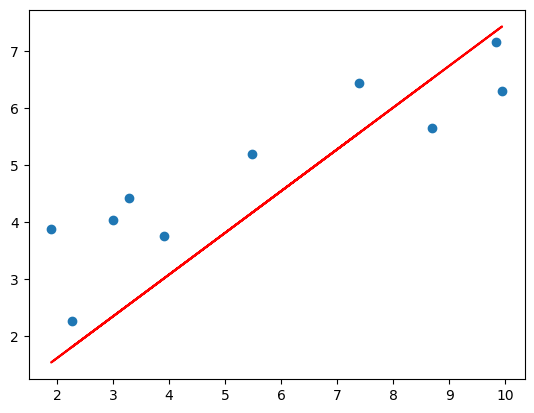

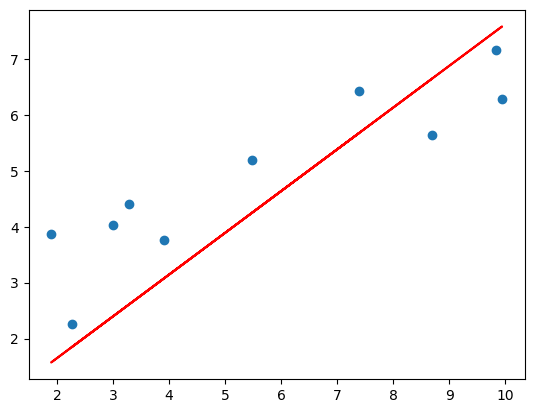

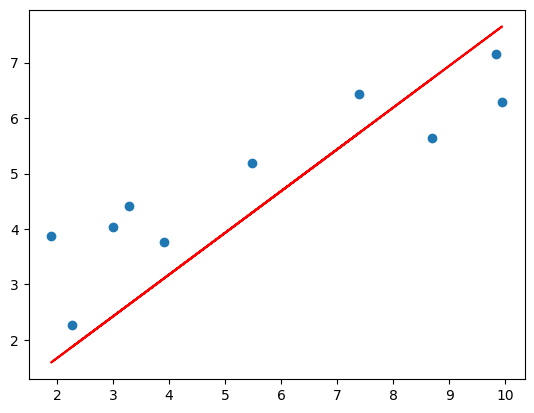

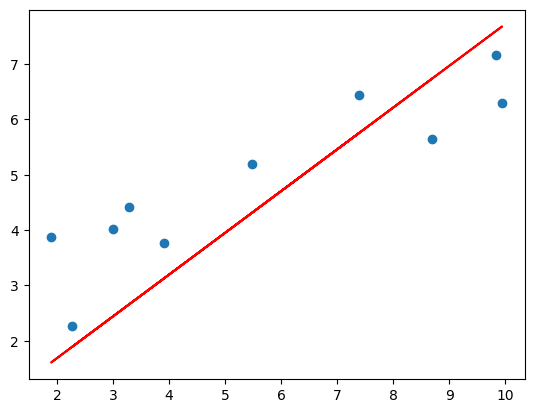

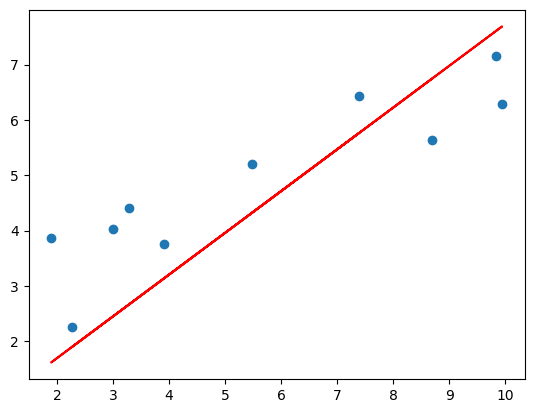

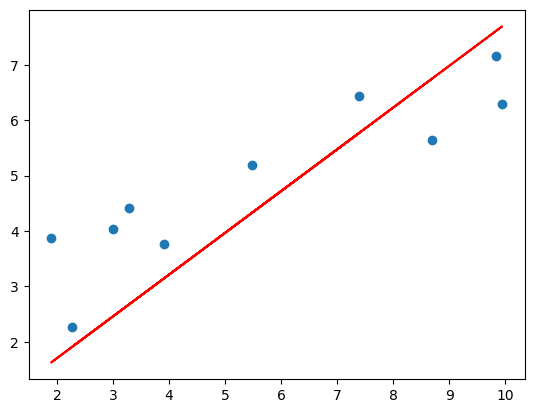

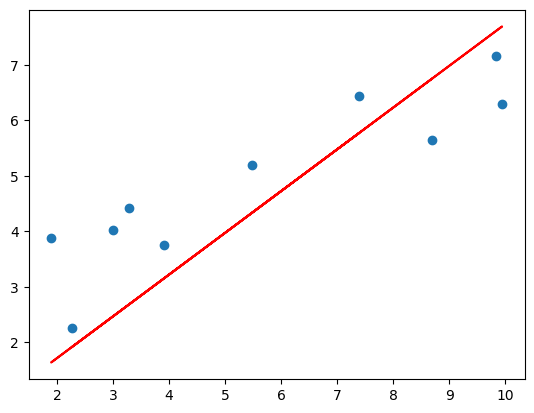

In [8]:

"""
2.  반복 횟수만큼 오차(loss)를 계산하고 
    beta_0,beta_1의 값을 변경하는 함수를 구현합니다.
    
    Step01. 실제 값 y와 prediction 함수를 통해 예측한 
    예측 값 pred_y 간의 차이(loss)를 계산합니다.
    
    loss는 실제값(y) - 예측값(pred_y)으로 정의하겠습니다. 
    
    Step02. 구현된 함수를 이용하여
    beta_0와 beta_1 의 변화값을 각각 beta0_delta, beta1_delta에 저장합니다.
"""
def gradient_descent(X, y, iters, lr):
    
    beta_0 = np.zeros((1,1))
    beta_1 = np.zeros((1,1))
    
    for i in range(iters):
        
        y_pred = beta_0 + beta_1*X
        loss = np.mean(np.square(y - y_pred))
        
        beta0_delta, beta1_delta = update_beta(X, y , y_pred, lr)
        
        beta_0 -= beta0_delta
        beta_1 -= beta1_delta
        
        # 100번의 학습마다 그래프 출력하기
        if i%100==0:
            print("학습 횟수 :",i)
            plotting_graph(X,y,beta_0,beta_1)
        
    return beta_0, beta_1


# 그래프를 시각화하는 함수입니다.
def plotting_graph(X,y,beta_0,beta_1):
    
    y_pred = beta_0 + beta_1[0,0] * X
    
    fig = plt.figure()
    
    plt.scatter(X, y)
    plt.plot(X, y_pred,c='r')


# 회귀 알고리즘 구현 진행을 위한 main() 함수입니다.  
def main():
    
    # 학습을 위해 필요한 파라미터입니다. 
    lr = 1e-4
    iteration = 1000
    
    X, y = load_data()
    
    beta_0, beta_1 = gradient_descent(X, y, iteration, lr)
    
    print("{}번의 학습 이후의 회귀 알고리즘 결과".format(iteration))
    print("beta_0:",beta_0[0], "beta_1:",beta_1[0])
    
    plotting_graph(X,y,beta_0,beta_1)
    
    return beta_0, beta_1

if __name__=="__main__":
    main()